### ls명령어로 현재 폴더에 Salaries.csv파일이 있는지 확인

In [1]:
ls

 count.txt                                        mul.py
'F8문제_8-13 OKR Overtime Pay 평균구하기.ipynb'   Quiz문제풀이.py
 F9문제-Copy1.ipynb                               README.md
 F9문제.ipynb                                    'Salaries (1).csv'
 flatten.py                                       studygit.txt
 gugudan                                          Untitled.ipynb


### import 정리

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

### 데이터 불러오기

In [3]:
data = pd.read_csv('Salaries (1).csv')
print(data.shape)

(148654, 13)


/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [5]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [6]:
data.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


### x축, y축 설정
* data의 TotalPay(OvertimePay 아님 ㅎ)를 년도별 평균을 내어 y에 저장(4개 숫자)
* data의 Year를 x에 저장(4개 숫자)

In [7]:
mean= data['TotalPay'].groupby(data['Year']).mean()
print(mean)
#mean_dict = dict(mean)   
#print(mean_dict)

Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64


In [8]:
y = mean.values
print(y)

[71744.10387124 74113.26226514 77611.44314205 75463.91814023]


### x 확인

In [9]:
x= mean.index  
x = x.astype(str)
x

Index(['2011', '2012', '2013', '2014'], dtype='object', name='Year')

### y 확인

In [10]:
y

array([71744.10387124, 74113.26226514, 77611.44314205, 75463.91814023])

### matplotlib, seaborn을 이용하여 각각 barplot을 그려보자
* 결과물이 다음 그래프와 동일하게 나와야 함
* 1번(plt)의 그래프 색은 빨강, 파랑, 분홍, 초록이며, 2번(sns)의 그래프 색은 twilight(palette설정 검색)
* 그래프 크기도 조절하여 최대한 맞춰볼 것

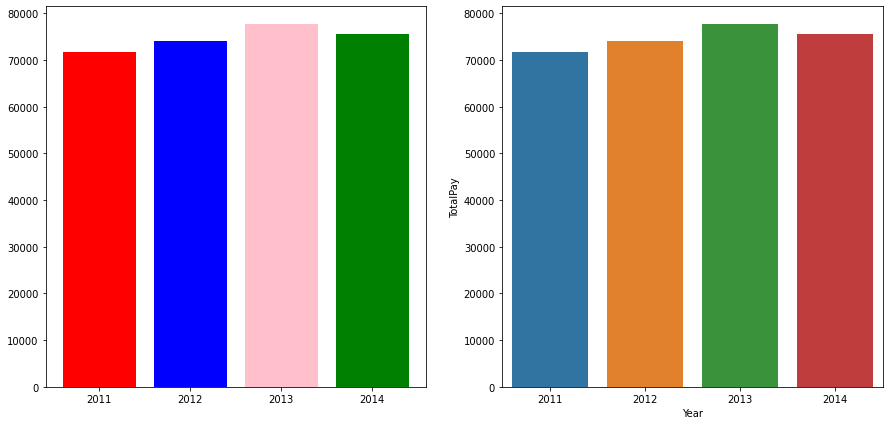

In [11]:
fig = plt.figure(figsize = (15,7))

# 1번 그래프 (plt)
ax1 = fig.add_subplot(1,2,1)
colors = ['red','blue','pink','green']
ax1.bar(x=x,height=y,color=colors)
# 라벨, 타이틀 달기
#plt.xlabel('Year')
#plt.ylabel('TotalPay')
#plt.title('Salaries')
#plt.xticks([0,1,2,3],label=['2011','2012','2013','2014'])

# 2번 그래프 (sns)
ax2 = fig.add_subplot(1,2,2)
sns.color_palette("twilight")
sns.barplot(x=x,y=y)
# 라벨, 타이틀 달기
#plt.xlabel('Year')
plt.ylabel('TotalPay')
#plt.title('Salaries')
plt.show()